In [80]:
%load_ext autoreload
%autoreload 2



import pathlib
import sys
import matplotlib.pyplot as plt
import numpy as np
import sklearn

# TO CHANGE
# absolute path to ACCAL/ACCAL folder
appPath = pathlib.Path(r"D:\Stage\ACCAL\ACCAL")
sys.path.append(str(appPath))




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
trueLink1 = [[6,8],
             [7,72],
             [17,65],
             [33,50],
             [36,43]]

trueLink2 = [[57,42],
             [1,39],
             [5,22],
             [11,47],
             [12,34,36],
             [21,37],
             [23,28],
             [25,46],
             [26,35]]

# Path to data 
dataFolderPath = pathlib.Path(r"D:\Stage\ACCAL\data\dataTest2") ### To change 
idList = trueLink2 ### To change 

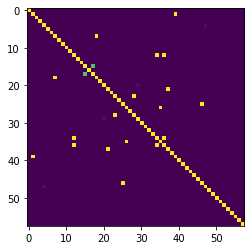

In [90]:
## import matProb

probMat = np.load(pathlib.Path(dataFolderPath,"temp","probMat.npy"))
plt.imshow(probMat)

In [91]:
## find the name id of a coin
## datatest 1:
#Coin R1 : monnaies 11557 - 11641
#Coin R2 : monnaies 11621 - 36848
#Coin R3 : monnaies 13310 - 34437
#Coin R4 : monnaies 15953 - 31336
#Coin R5 : monnaies 16663 - 18856

trueLink1 = [[6,8],
             [7,72],
             [17,65],
             [33,50],
             [36,43]]
             

## datatest 2:
#"6379 - 36345",
#"11507 - 34820",
#"13583 - 30038",
#"16378 - 37873",
#"16644 - 33782 - 34257",
#"19045 - 34490",
#"30261 - 30957",
#30826 - 37775",
#"30839 - 33878"


trueLink2 = [[57,42],
             [1,39],
             [5,22],
             [11,47],
             [12,34,36],
             [21,37],
             [23,28],
             [25,46],
             [26,35]]
             

In [92]:
## Création d'un vecteur avec les vrai clusters

## Création d'un vecteur avec les vrai clusters
n,_ = np.shape(probMat)
Ztrue = np.zeros(n,dtype = np.int64)
Ztrue = Ztrue-1



countClust = 0
for clust in idList:
    for i in clust:
        Ztrue[i] = countClust
    countClust = countClust +1 
    
#Ajouter le reste des clusters
for idx,val in enumerate(Ztrue):
    if val == -1:
        Ztrue[idx] = countClust
        countClust = countClust +1 
print("Vrai vecteur Z de référence:")
print(Ztrue)

Vrai vecteur Z de référence:
[ 9  1 10 11 12  2 13 14 15 16 17  3  4 18 19 20 21 22 23 24 25  5  2  6
 26  7  8 27  6 28 29 30 31 32  4  8  4  5 33  1 34 35  0 36 37 38  7  3
 39 40 41 42 43 44 45 46 47  0]


In [93]:
from sklearn.cluster import AgglomerativeClustering
distProb = 1 - probMat

model = AgglomerativeClustering(n_clusters=None,affinity = 'precomputed',distance_threshold=0.1,linkage='average')
res = model.fit(distProb)

Zalgo = res.labels_

print(Zalgo)

[46  4 29 45 48 44 43  3 42 41 40 39  0 38 37 49 36 22  3 33 47  1 32  6
 31  5  2 30  6 23 27 26 25 24  0  2  0  1 20  4 18 35 34 15 14 28  5 17
 21 19  8 16 13 11  9  7 12 10]


In [94]:
from sklearn import metrics
nmi = metrics.normalized_mutual_info_score(Ztrue, Zalgo) 
print("NMI : ")
print(nmi)

NMI : 
0.9875392517547521


In [95]:
from sklearn.metrics.cluster import pair_confusion_matrix
confM = pair_confusion_matrix(Ztrue,Zalgo)
TN,FP,FN,TP = confM.ravel()
TPR = TP/(TP + FN)
FDR = FP/(FP + TP)
print("matrice de confusion initiale :")
## Forme de la matrice 
#  | TN  FP |
#  | FN  TP |
print(confM)
print("TPR:",TPR)
print("FDR:",FDR)

matrice de confusion initiale :
[[3282    2]
 [   6   16]]
TPR: 0.7272727272727273
FDR: 0.1111111111111111


In [88]:
trueLink2 = [[57,42],
             [1,39], #
             [5,22],
             [11,47],
             [12,34,36],#
             [21,37],#
             [23,28], #
             [25,46], #
             [26,35]]#


##### false 
# 7 - 18
             

In [127]:
np.argwhere(np.array(Zalgo)==7)

array([[55]], dtype=int64)

In [130]:
imgPathList = sorted( list(pathlib.Path(dataFolderPath,"temp","croppedImages").glob("*.png")))


img1 = plt.imread(imgPathList[5])
img2 = plt.imread(imgPathList[22])



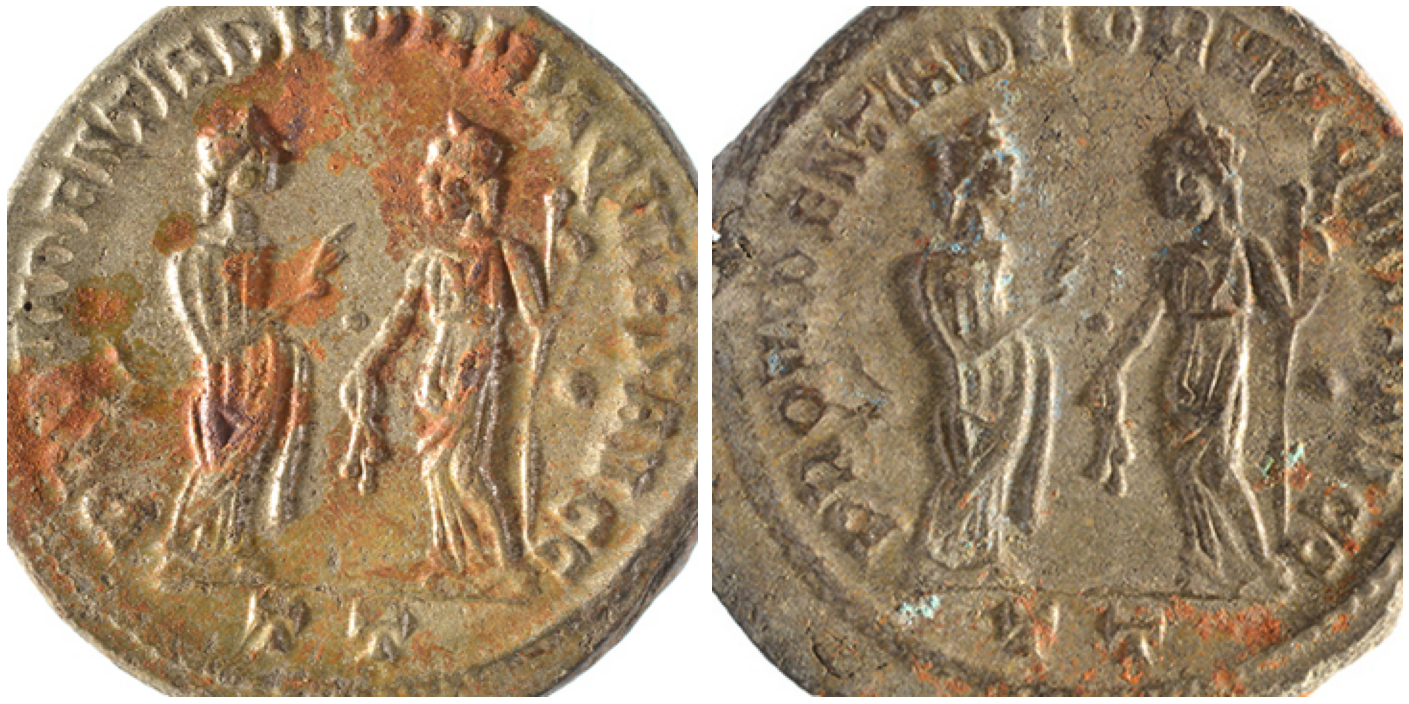

In [131]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize= (25,46))

ax1.axis("off")
ax2.axis("off")
ax1.imshow(img1)
ax2.imshow(img2)
fig.subplots_adjust(wspace=0.02, hspace=0)
fig.savefig("falseNeg",bbox_inches='tight',dpi=300)
